<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [7]:
sample

array([-1.44350591e-01,  1.00918236e-01, -7.10430662e-02, -6.49478542e-02,
        4.53575940e-03,  1.44980951e-01,  1.61530999e-02,  2.23436464e-02,
        9.85340446e-02, -7.79051847e-02, -5.65599110e-02, -1.41886614e-01,
        5.72745779e-02, -2.53016497e-02,  2.12829574e-01, -5.77278853e-02,
       -5.95238556e-02,  4.75273880e-02, -5.72391977e-02, -1.40923742e-01,
        2.65633223e-02,  3.47620360e-02, -6.64032286e-02, -6.26529160e-02,
        3.92945455e-02, -4.69083779e-02,  1.81720117e-01,  7.16475784e-02,
        6.59799430e-02,  5.30030410e-02, -4.58180223e-02,  9.33406066e-02,
       -1.25174686e-01, -2.26739038e-02, -6.10705645e-02,  1.01023380e-01,
       -2.09938594e-01, -8.36437370e-02, -7.82707797e-02, -4.49716521e-02,
        5.70272108e-02, -5.83207649e-02,  6.10329045e-02,  9.35871452e-03,
        2.69371776e-02,  7.84400185e-02, -1.05084686e-01,  2.06135384e-02,
        8.82179029e-02, -1.18574134e-01,  1.88385174e-02,  1.99151919e-01,
       -1.81719598e-02,  

In [8]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [9]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

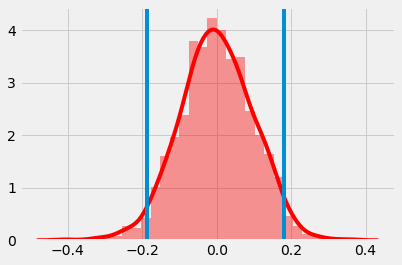

In [10]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

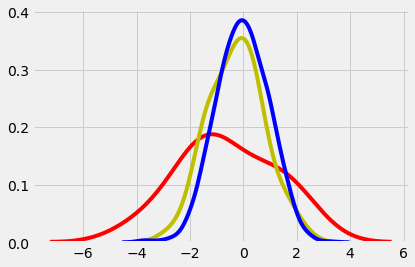

In [12]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [13]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.6064863082426963
Standard Deviation: 1.6845042755318693
Variance: 2.8375546542851477
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.2751916406404393
Standard Deviation: 1.0367394805825891
Variance: 1.0748287505986567
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.036114473146136236
Standard Deviation: 0.9801413545801164
Variance: 0.9606770749581456


In [14]:
import pandas as pd

# Missing LAR (no team roster page on NFL.com)
teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU',
         'IND','JAX','KC','LAC','MIA','MIN','NE','NO','NYG','NYJ','OAK','PHI',
         'PIT','SEA','SF','TB','TEN','WAS']    

df_list = []
for team in teams: 
    df = pd.read_html(f'http://www.nfl.com/teams/roster?team={team}')[1]
    df['Team'] = team
    df.columns = ['No','Name','Pos','Status','Height','Weight','Birthdate','Exp','College','Team']
    df_list.append(df)
    
final_df = pd.concat(df_list, ignore_index=True)
print(final_df.shape)
final_df.head()

(2883, 10)


,No,Name,Pos,Status,Height,Weight,Birthdate,Exp,College,Team
0,23,"Alford, Robert",CB,ACT,"5'10""",186,11/1/1988,7,Southeastern Louisiana,ARI
1,97,"Allen, Zach",DE,ACT,"6'5""",285,8/20/1997,0,Boston College,ARI
2,3,"Anderson, Drew",QB,ACT,"6'4""",221,10/18/1995,0,Murray State,ARI
3,71,"Bailey, Sterling",DE,ACT,"6'3""",296,9/13/1992,1,Georgia,ARI
4,32,"Baker, Budda",SS,ACT,"5'10""",195,1/10/1996,3,Washington,ARI


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
# Creating sample of 1000 and 800
burnerA=np.random.normal(180,5,1000)
burnerB=np.random.normal(178.5,4.25,800)

In [17]:
#look first 10
burnerA[:10]

array([176.64211268, 191.20479426, 186.34996155, 175.6303955 ,
       182.76112671, 175.05384417, 183.60008416, 177.57487147,
       169.37430308, 178.50950513])

In [18]:
burnerB[:10]

array([186.8699115 , 171.13370416, 176.81360981, 175.62448659,
       178.14944861, 180.06851848, 176.42229667, 182.3156441 ,
       182.61553244, 167.52695877])

In [19]:
#compute stander deviation
for sample in [burnerA, burnerB]:
  #mu=sample.mean()
  #print('Mean: {}'.format(mu))
  print(f'Mean: {sample.mean()}') # compute variable in the string/ calculate during print
  print(f'Stdv:{sample.std()}')
  print('------------')


Mean: 180.12169142845863
Stdv:4.968883058281202
------------
Mean: 178.81412099726512
Stdv:4.1301949568450205
------------


In [20]:
tstat, pvalue = ttest_ind(burnerA, burnerB)
print(tstat)
print(pvalue)

5.969828272856324
2.854839381496588e-09


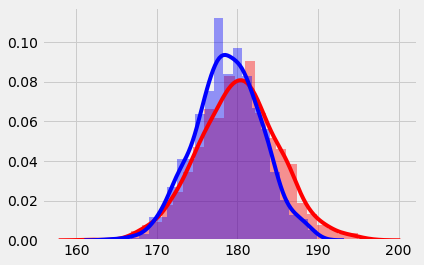

In [23]:
sns.distplot(burnerA, color='r')
sns.distplot(burnerB, color='b')

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means